In [1]:
# OBSERVATIONS:
    
# 1. When we look at the box-plot chart on tumors per regimen, compare to Infubinol and Ceftamin, 
# the Capomulin and Ramicane are more effective in curing the tumor.

# 2. Capomulin is the most successful in reducing the tumor for the mice of all the drugs
# and it has the most data in the study results.

# 3. With the scatter plot results on Average tumor volume vs. mouse weight for the 
# Capomulin regimen we can study that lesser the mouse weight, the drug treatment is more successful.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

In [4]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
merged_data =mouse_metadata.merge(study_results, left_on='Mouse ID', right_on='Mouse ID')
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
mouse_count = merged_data["Mouse ID"].value_counts()
mouse_count

g989    13
y769    10
l700    10
x402    10
s710    10
        ..
u153     1
t573     1
d133     1
b447     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
duplicate_data = merged_data[merged_data.duplicated(subset= ["Mouse ID","Timepoint"])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
duplicate_mouse_id = duplicate_data["Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

data_mouse = pd.DataFrame(merged_data[merged_data["Mouse ID"] == "g989"])
data_mouse
             

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mousedata_df = merged_data[merged_data["Mouse ID"] != "g989"]
clean_mousedata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
mouse_count_df = clean_mousedata_df["Mouse ID"].value_counts()
mouse_count_df

o926    10
k483    10
g296    10
c282    10
k210    10
        ..
f932     1
b447     1
x336     1
u153     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [12]:
summary_statistics_table = clean_mousedata_df.groupby(by ="Drug Regimen").agg(Mean_Tumor_Volume=("Tumor Volume (mm3)","mean"),
                                                                          Median_Tumor_Volume=("Tumor Volume (mm3)","median"),
                                                                          Tumor_Volume_Variance = ("Tumor Volume (mm3)","var"),
                                                                          Tumor_Volume_Std_Dev = ("Tumor Volume (mm3)","std"),
                                                                          Tumor_Volume_Std_Err = ("Tumor Volume (mm3)","sem"))
summary_statistics_table                       

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
singleLine_statistics_table = clean_mousedata_df.groupby(by ="Drug Regimen").agg({ "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
singleLine_statistics_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Text(0.5, 1.0, 'bar plot with dataframe')

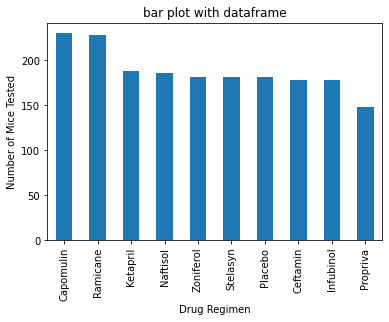

In [14]:
plotdata = clean_mousedata_df["Drug Regimen"].value_counts().plot( kind="bar")
plotdata.set_xlabel("Drug Regimen")
plotdata.set_ylabel("Number of Mice Tested")
plotdata.set_title("bar plot with dataframe")

Text(0, 0.5, 'Number of Mice Tested')

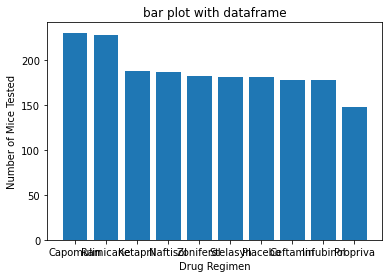

In [15]:
plotdata = clean_mousedata_df["Drug Regimen"].value_counts()
plt.bar(plotdata.index,plotdata.values, align="center")
plt.title("bar plot with dataframe")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


In [16]:
gender = clean_mousedata_df.groupby(by ="Sex").count()
gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [17]:
gender_count = [gender["Mouse ID"]]
gender_count

[Sex
 Female    922
 Male      958
 Name: Mouse ID, dtype: int64]

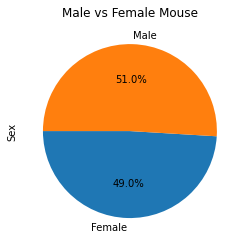

In [18]:
pie = gender["Mouse ID"].plot.pie(y='gender_count', autopct="%1.1f%%",startangle=180)
plt.title('Male vs Female Mouse')
plt.ylabel('Sex')


plt.show()  

In [19]:
labels = ['Female', 'Male']
labels

['Female', 'Male']

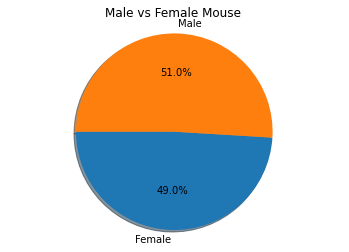

In [20]:
plt.pie(gender["Mouse ID"], labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Male vs Female Mouse ')
plt.axis("equal")


plt.show()

In [21]:
mouse_id_max = clean_mousedata_df.groupby('Mouse ID').max()['Timepoint']
mouse_id_data = pd.DataFrame(mouse_id_max)
mouse_id_data

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [22]:
mouse_id_merge = pd.merge(mouse_id_data, clean_mousedata_df, on=("Mouse ID", "Timepoint"),how="left")
mouse_id_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
Capomulin_data = mouse_id_merge.loc[mouse_id_merge["Drug Regimen"] == "Capomulin",:]
Ramicane_data = mouse_id_merge.loc[mouse_id_merge["Drug Regimen"] == "Ramicane",:]
Infubinol_data = mouse_id_merge.loc[mouse_id_merge["Drug Regimen"] == "Infubinol",:]
Ceftamin_data= mouse_id_merge.loc[mouse_id_merge["Drug Regimen"] == "Ceftamin", :]
Capomulin_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
80,i557,45,Capomulin,Female,1,24,47.685963,1
83,i738,45,Capomulin,Female,23,20,37.311846,2
85,j119,45,Capomulin,Female,7,23,38.125164,1
87,j246,35,Capomulin,Female,21,21,38.753265,1
108,l509,45,Capomulin,Male,17,21,41.483008,3


In [24]:
tumor_Capomulin = Capomulin_data["Tumor Volume (mm3)"]
quartiles = tumor_Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin regimen upper quartile of tumor volume is: {upperq}.")
print(f"Capomulin regimen lower quartile of tumor volume is: {lowerq}.")
print(f"Capomulin regimen interquartile range of tumor volme is: {iqr}.")
print(f"Capomulin regimen median of tumor volume is: {quartiles[0.5]}.")
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")


Capomulin regimen upper quartile of tumor volume is: 40.1592203.
Capomulin regimen lower quartile of tumor volume is: 32.37735684.
Capomulin regimen interquartile range of tumor volme is: 7.781863460000004.
Capomulin regimen median of tumor volume is: 38.1251644.
Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [25]:
tumor_Ramicane = Ramicane_data["Tumor Volume (mm3)"]
quartiles = tumor_Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane regimen upper quartile of tumor volume is: {upperq}.")
print(f"Ramicane regimen lower quartile of tumor volume is: {lowerq}.")
print(f"Ramicane regimen interquartile range of tumor volme is: {iqr}.")
print(f"Ramicane regimen median of tumor volume is: {quartiles[0.5]}.")
print(f"Ramicane potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Ramicane regimen upper quartile of tumor volume is: 40.65900627.
Ramicane regimen lower quartile of tumor volume is: 31.56046955.
Ramicane regimen interquartile range of tumor volme is: 9.098536719999998.
Ramicane regimen median of tumor volume is: 36.56165229.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [26]:
tumor_Infubinol = Infubinol_data["Tumor Volume (mm3)"]
quartiles = tumor_Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Infubinol regimen upper quartile of tumor volume is: {upperq}.")
print(f"Infubinol regimen lower quartile of tumor volume is: {lowerq}.")
print(f"Infubinol regimen interquartile range of tumor volme is: {iqr}.")
print(f"Infubinol regimen median of tumor volume is: {quartiles[0.5]}.")
print(f"Infubinol potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Infubinol regimen upper quartile of tumor volume is: 65.52574285.
Infubinol regimen lower quartile of tumor volume is: 54.04860769.
Infubinol regimen interquartile range of tumor volme is: 11.477135160000003.
Infubinol regimen median of tumor volume is: 60.16518046.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [27]:
tumor_Ceftamin = Ceftamin_data["Tumor Volume (mm3)"]
quartiles = tumor_Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ceftamin regimen upper quartile of tumor volume is: {upperq}.")
print(f"Ceftamin regimen lower quartile of tumor volume is: {lowerq}.")
print(f"Ceftamin regimen interquartile range of tumor volme is: {iqr}.")
print(f"Ceftamin regimen median of tumor volume is: {quartiles[0.5]}.")
print(f"Ceftamin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Ceftamin regimen upper quartile of tumor volume is: 64.29983003.
Ceftamin regimen lower quartile of tumor volume is: 48.72207785.
Ceftamin regimen interquartile range of tumor volme is: 15.577752179999997.
Ceftamin regimen median of tumor volume is: 59.85195552.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x1b7ce3a7dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7ce3b64c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7ce3a7a60>,
 'medians': [<matplotlib.lines.Line2D at 0x1b7ce3b6b80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b7ce3b6ee0>,
 'means': []}

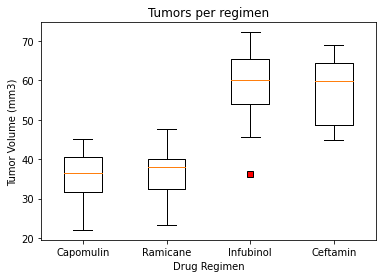

In [28]:
# Generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any 
# potential outliers in the plot by changing their color and style

plot_data = [tumor_Ramicane, tumor_Capomulin, tumor_Infubinol, tumor_Ceftamin]
red_square = dict(markerfacecolor='red', marker='s')
figure1, axis1 = plt.subplots()
axis1.set_title('Tumors per regimen')
axis1.set_ylabel('Tumor Volume (mm3)')
axis1.set_xlabel('Drug Regimen')

axis1.boxplot(plot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",],flierprops=red_square)



In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_mousedata_df.loc[clean_mousedata_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()

capomulin_l509_data = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
capomulin_l509_data


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
196,371,l509,Capomulin,Male,17,21,0,45.000000,0
197,372,l509,Capomulin,Male,17,21,5,45.851193,0
198,373,l509,Capomulin,Male,17,21,10,46.759074,0
199,374,l509,Capomulin,Male,17,21,15,47.488599,1
200,375,l509,Capomulin,Male,17,21,20,48.070452,2
201,376,l509,Capomulin,Male,17,21,25,44.006257,2
202,377,l509,Capomulin,Male,17,21,30,44.708055,2
203,378,l509,Capomulin,Male,17,21,35,40.207288,2
204,379,l509,Capomulin,Male,17,21,40,40.770813,2
205,380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0.5, 1.0, 'Mouse l509 with Capomulin Treatment')

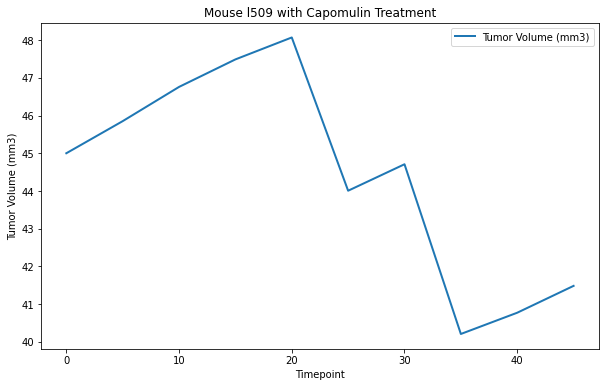

In [30]:
capomulin_l509_data = capomulin_l509_data.loc[:,["Timepoint", "Tumor Volume (mm3)"]]
capomulin_l509_data = capomulin_l509_data.reset_index(drop=True)
capomulin_l509_data.set_index('Timepoint').plot(figsize=(10,6), linewidth=2.0)
plt.ylabel('Tumor Volume (mm3)')
plt.title("Mouse l509 with Capomulin Treatment")



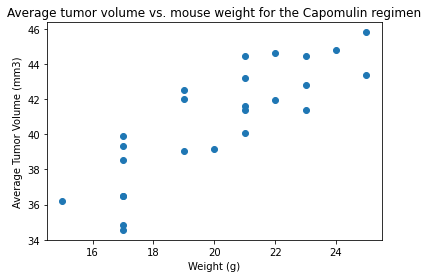

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'])

plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'])[0],2)
linear_regression_model =st.linregress(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'])
linear_regression_model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134, intercept_stderr=2.590987686768349)

The correlation between mouse weight and the average tumor volume is: 0.84.


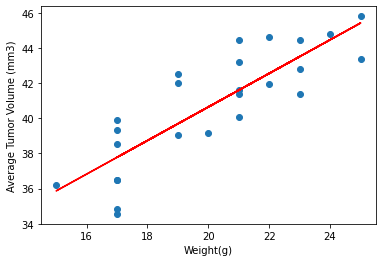

In [33]:
slope = 0.9544396890241045
intercept = 21.552160532685015
yaxis_values = Capomulin_average['Weight (g)']*slope+intercept
plt.scatter(Capomulin_average['Weight (g)'],Capomulin_average['Tumor Volume (mm3)'])
plt.plot(Capomulin_average['Weight (g)'],yaxis_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is: {correlation}.")